In [7]:
# Importing Python Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from pandas import DataFrame
from sklearn import preprocessing, model_selection, metrics
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings('ignore')

# Setting Seed

np.random.seed(32)

# Reading the data set

In [8]:
gpuread = pd.read_csv("sgemm_product.csv")
gpuread.shape


(241600, 18)

In [9]:
gpuread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
MWG          241600 non-null int64
NWG          241600 non-null int64
KWG          241600 non-null int64
MDIMC        241600 non-null int64
NDIMC        241600 non-null int64
MDIMA        241600 non-null int64
NDIMB        241600 non-null int64
KWI          241600 non-null int64
VWM          241600 non-null int64
VWN          241600 non-null int64
STRM         241600 non-null int64
STRN         241600 non-null int64
SA           241600 non-null int64
SB           241600 non-null int64
Run1 (ms)    241600 non-null float64
Run2 (ms)    241600 non-null float64
Run3 (ms)    241600 non-null float64
Run4 (ms)    241600 non-null float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [10]:
gpuread.head(10)

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81
5,16,16,16,8,8,8,8,2,1,1,0,1,0,1,81.10,82.41,87.01,82.14
6,16,16,16,8,8,8,8,2,1,1,0,1,1,0,83.31,82.86,88.60,82.97
7,16,16,16,8,8,8,8,2,1,1,0,1,1,1,93.13,94.30,96.19,94.43
8,16,16,16,8,8,8,8,2,1,1,1,0,0,0,117.38,116.95,124.15,117.83
9,16,16,16,8,8,8,8,2,1,1,1,0,0,1,85.76,85.30,86.96,87.19


In [172]:
gpuread.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000


# Checking for NA

In [173]:
gpuread.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [11]:
# Calculating average gpu run time

df_run = DataFrame(gpuread,columns=['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'])

gpuread['Avg_Run'] = df_run.mean(axis =1)
gpuread

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Avg_Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.96,17.77,17.77,17.77,17.8175
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.04,36.03,36.04,36.03,36.0350
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.28,34.82,35.27,35.27,35.1600
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.43,28.49,28.44,28.45,28.4525


In [12]:
# Removing Run 1 to Run 4 from Data

gpuread = gpuread.drop('Run1 (ms)',axis=1)
gpuread = gpuread.drop('Run2 (ms)',axis=1)
gpuread = gpuread.drop('Run3 (ms)',axis=1)
gpuread = gpuread.drop('Run4 (ms)',axis=1)
gpuread


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Avg_Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.8175
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.0350
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.1600
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.4525


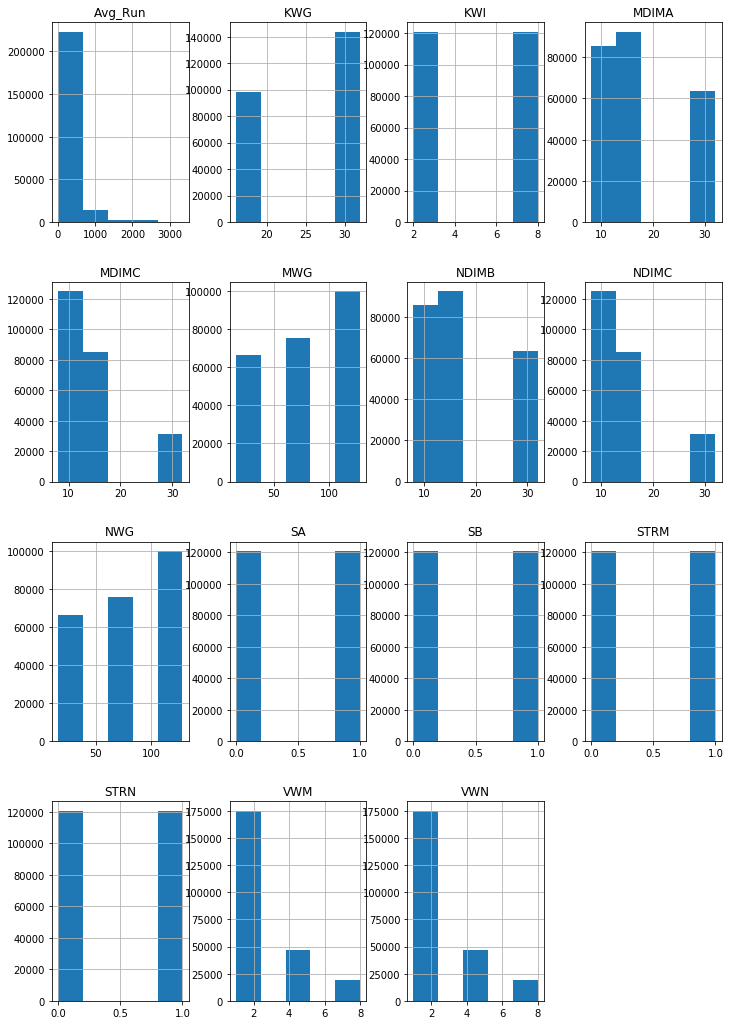

In [13]:
# Histogram of all the features to understand the distribution

gpuread.hist(bins = 5 , figsize= (12,18)) ;

In [14]:
gpuread['log_avg_run'] = np.log(gpuread.Avg_Run).round(3)

gpuread

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Avg_Run,log_avg_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700,4.757
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050,4.366
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650,4.389
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375,4.462
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625,4.776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.8175,2.880
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.0350,3.584
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.1600,3.560
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.4525,3.348


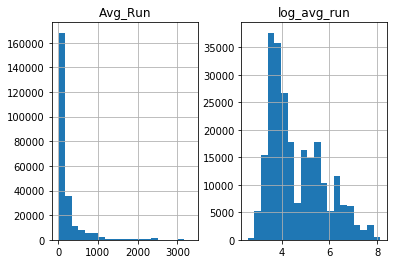

In [15]:
Average_Run_Time = ["Avg_Run","log_avg_run"]
Average_Run_Time=gpuread[Average_Run_Time]
Average_Run_Time.hist(bins = 20 ) ;

In [16]:
# finding correlatin matrix of all the attributes
gpuread = gpuread.drop('Avg_Run',axis=1)
gpuread.corr()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,log_avg_run
MWG,1.000000e+00,5.999256e-04,9.295914e-03,1.057905e-01,-8.590185e-03,1.587719e-01,1.489790e-02,1.477334e-19,3.537634e-01,-8.409828e-04,6.925002e-21,1.385000e-21,0.00000,0.000000,0.459029
NWG,5.999256e-04,1.000000e+00,9.295914e-03,-8.590185e-03,1.057905e-01,1.489790e-02,1.587719e-01,8.568535e-19,-8.409828e-04,3.537634e-01,6.925002e-21,1.385000e-21,0.00000,0.000000,0.346429
KWG,9.295914e-03,9.295914e-03,1.000000e+00,1.483483e-01,1.483483e-01,-3.456333e-02,-3.456333e-02,-1.809508e-19,-1.198611e-02,-1.198611e-02,1.871905e-21,0.000000e+00,0.00000,0.000000,-0.020357
MDIMC,1.057905e-01,-8.590185e-03,1.483483e-01,1.000000e+00,-2.095622e-01,1.974329e-01,8.460552e-02,-3.179926e-18,-1.339114e-01,1.053121e-02,-1.120569e-20,-3.735230e-21,0.00000,0.000000,-0.252084
NDIMC,-8.590185e-03,1.057905e-01,1.483483e-01,-2.095622e-01,1.000000e+00,8.460552e-02,1.974329e-01,-5.251734e-18,1.053121e-02,-1.339114e-01,-1.120569e-20,-3.735230e-21,0.00000,0.000000,-0.243448
MDIMA,1.587719e-01,1.489790e-02,-3.456333e-02,1.974329e-01,8.460552e-02,1.000000e+00,8.809625e-02,-4.552194e-18,-2.027124e-01,-1.903229e-02,1.566122e-21,1.566122e-21,0.00000,0.000000,-0.023076
NDIMB,1.489790e-02,1.587719e-01,-3.456333e-02,8.460552e-02,1.974329e-01,8.809625e-02,1.000000e+00,-1.083339e-17,-1.903229e-02,-2.027124e-01,1.566122e-21,1.566122e-21,0.00000,0.000000,-0.033687
KWI,1.477334e-19,8.568535e-19,-1.809508e-19,-3.179926e-18,-5.251734e-18,-4.552194e-18,-1.083339e-17,1.000000e+00,-3.613975e-16,-4.814803e-16,0.000000e+00,0.000000e+00,0.00000,0.000000,-0.011201
VWM,3.537634e-01,-8.409828e-04,-1.198611e-02,-1.339114e-01,1.053121e-02,-2.027124e-01,-1.903229e-02,-3.613975e-16,1.000000e+00,1.164501e-03,-1.411219e-20,9.408125e-22,0.00000,0.000000,0.209574
VWN,-8.409828e-04,3.537634e-01,-1.198611e-02,1.053121e-02,-1.339114e-01,-1.903229e-02,-2.027124e-01,-4.814803e-16,1.164501e-03,1.000000e+00,-1.411219e-20,9.408125e-22,0.00000,0.000000,0.145031


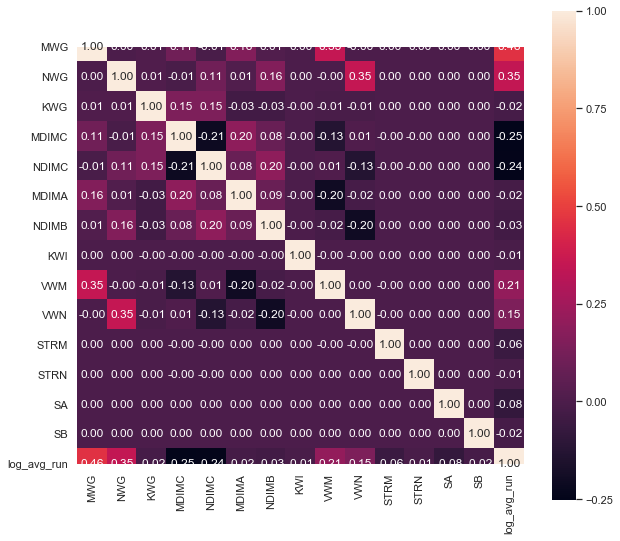

In [17]:
#Ploting correlation matrix

gpuread_col = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'log_avg_run']
gpuread_corr=gpuread.corr()
plt.figure(figsize = (10,9))
sns.set(font_scale=1)
sns.heatmap(gpuread_corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=gpuread_col, yticklabels=gpuread_col)
plt.show();

# Multicollinearity Check

In [17]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(gpuread, 40))
    

Top Absolute Correlations
MWG    log_avg_run    0.459029
NWG    VWN            0.353763
MWG    VWM            0.353763
NWG    log_avg_run    0.346429
MDIMC  log_avg_run    0.252084
NDIMC  log_avg_run    0.243448
VWM    log_avg_run    0.209574
MDIMC  NDIMC          0.209562
NDIMB  VWN            0.202712
MDIMA  VWM            0.202712
MDIMC  MDIMA          0.197433
NDIMC  NDIMB          0.197433
NWG    NDIMB          0.158772
MWG    MDIMA          0.158772
KWG    MDIMC          0.148348
       NDIMC          0.148348
VWN    log_avg_run    0.145031
NDIMC  VWN            0.133911
MDIMC  VWM            0.133911
NWG    NDIMC          0.105791
MWG    MDIMC          0.105791
MDIMA  NDIMB          0.088096
SA     log_avg_run    0.084740
MDIMC  NDIMB          0.084606
NDIMC  MDIMA          0.084606
STRM   log_avg_run    0.058792
KWG    NDIMB          0.034563
       MDIMA          0.034563
NDIMB  log_avg_run    0.033687
MDIMA  log_avg_run    0.023076
KWG    log_avg_run    0.020357
SB     log_av

# Normalize using StandardScaler function

In [18]:
sc_data = StandardScaler()
df = sc_data.fit_transform(gpuread)
df = pd.DataFrame(df)
df.columns = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI',
       'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB', 'log_avg_run']
df.head()


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,log_avg_run
0,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,-1.0,-1.0,-1.0,0.118679
1,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,-1.0,-1.0,1.0,-0.227790
2,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,-1.0,1.0,-1.0,-0.207410
3,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,-1.0,1.0,1.0,-0.142724
4,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,1.0,-1.0,-1.0,0.135515


# Experiment 1 Part A

In [19]:
#setting the matrices
X = df.iloc[:,0:14]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
#print(X)

y = df.iloc[:,14:15].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
beta = np.zeros([1,15])
print(y)

# Splitting the data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

[[ 0.11867869]
 [-0.22779016]
 [-0.20740964]
 ...
 [-0.94199451]
 [-1.12984974]
 [-1.54454904]]


# Experiment_1

In [21]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

scaler = StandardScaler() 
  
# To scale data 
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)
y1_train = scaler.fit_transform(y1_train)
y1_test=scaler.transform(y1_test)

def costFunction(dataFile, dataTarget, coeffMatrix):
    dataLength = len(dataFile);
    costValue = np.sum(((dataFile.dot(coeffMatrix.T)) - dataTarget) ** 2) / (2 * dataLength);
    return costValue;

def gradientDescent(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list1=[0.001]; #threshold level
    cost1 = []
    for k in list1:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;

# Predict

In [22]:
def predict(testData, coeffMatrix):
    predictedTarget = testData.dot(coeffMatrix.T);
    return predictedTarget;

# Mean Squared Error

In [23]:
def calculateMSE(testTarget, predictedTarget):
    modelRMSE = (sum((testTarget - predictedTarget) ** 2) / len(testTarget));
    return modelRMSE;

# R- Squared

In [24]:
def modelRSquared(testTarget, predictedTarget):
    targetMean = np.mean(testTarget);
    totalSSE = np.sum((testTarget - targetMean) ** 2);
    residualSSE = np.sum((testTarget - predictedTarget) ** 2);
    rSquared = 1 - (residualSSE / totalSSE);
    return rSquared;

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 0.001 

Cost Function converges at 14 

Model Cost:  0.2234205284383406 

Model Coefficients: 
[[ 0.00000000e+00  5.02711598e-01  3.96888892e-01  8.74278405e-02
  -3.96128268e-01 -3.80901078e-01  1.01537402e-03 -1.88905513e-04
  -1.02494428e-02 -1.48788919e-02 -4.07202188e-02 -5.92750696e-02
  -7.41692965e-03 -8.35714643e-02 -2.08337214e-02]]
alpha: 0.2


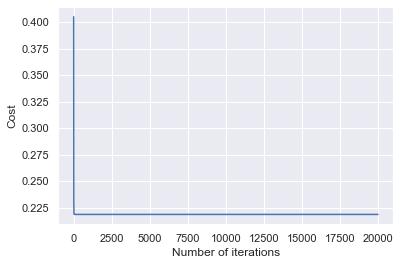

In [30]:
#Model Training for Alpha = 0.2
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.2, 20000);
    return coeffMatrix;
linearModel_tr1= developLinearModel(x1_train,y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 0.001 

Cost Function converges at 24 

Model Cost:  0.22778496191252517 

Model Coefficients: 
[[ 0.00000000e+00  5.02711598e-01  3.96888892e-01  8.74278405e-02
  -3.96128268e-01 -3.80901078e-01  1.01537402e-03 -1.88905513e-04
  -1.02494428e-02 -1.48788919e-02 -4.07202188e-02 -5.92750696e-02
  -7.41692965e-03 -8.35714643e-02 -2.08337214e-02]]
alpha: 0.1


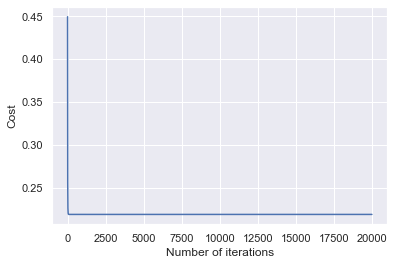

In [31]:
#Model Training for Alpha = 0.1
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.1, 20000);
    return coeffMatrix;
linearModel_tr2= developLinearModel(x1_train,y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 0.001 

Cost Function converges at 83 

Model Cost:  0.2895751085555963 

Model Coefficients: 
[[ 0.00000000e+00  5.02711598e-01  3.96888892e-01  8.74278405e-02
  -3.96128268e-01 -3.80901078e-01  1.01537402e-03 -1.88905513e-04
  -1.02494428e-02 -1.48788919e-02 -4.07202188e-02 -5.92750696e-02
  -7.41692965e-03 -8.35714643e-02 -2.08337214e-02]]
alpha: 0.01


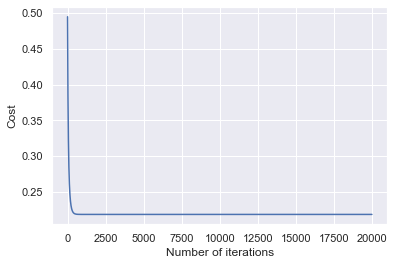

In [32]:
#Model Training for Alpha = 0.01
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.01, 20000);
    return coeffMatrix;
linearModel_tr3= developLinearModel(x1_train,y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 0.001 

Cost Function converges at 92 

Model Cost:  0.34328432371918627 

Model Coefficients: 
[[ 0.00000000e+00  5.02711598e-01  3.96888892e-01  8.74278405e-02
  -3.96128268e-01 -3.80901078e-01  1.01537402e-03 -1.88905513e-04
  -1.02494428e-02 -1.48788919e-02 -4.07202188e-02 -5.92750696e-02
  -7.41692965e-03 -8.35714643e-02 -2.08337214e-02]]
alpha: 0.005


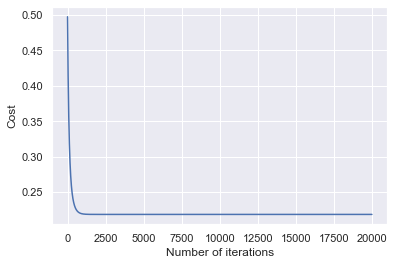

In [33]:
#Model Training for Alpha = 0.005
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.005, 20000);
    return coeffMatrix;
linearModel_tr4= developLinearModel(x1_train,y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4957744898558307 

Threshold level 0.001 

Cost Function converges at 14 

Model Cost:  0.2243008705745442 

Model Coefficients: 
[[ 0.          0.49798128  0.39646621  0.08274299 -0.39506821 -0.3831481
   0.00124869 -0.0027087  -0.01340742 -0.01663454 -0.04167878 -0.05741368
  -0.00863371 -0.08716639 -0.01901193]]
alpha: 0.2


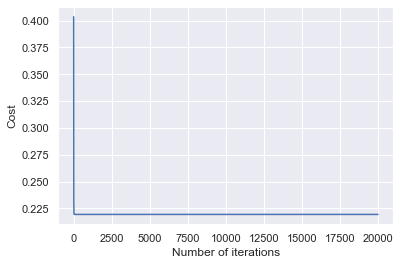

In [34]:
#Model testing for Alpha = 0.2
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.2, 20000);
    return coeffMatrix;

linearModel_te1 = developLinearModel(x1_test,y1_test);


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4957744898558307 

Threshold level 0.001 

Cost Function converges at 24 

Model Cost:  0.22869213501588587 

Model Coefficients: 
[[ 0.          0.49798128  0.39646621  0.08274299 -0.39506821 -0.3831481
   0.00124869 -0.0027087  -0.01340742 -0.01663454 -0.04167878 -0.05741368
  -0.00863371 -0.08716639 -0.01901193]]
alpha: 0.1


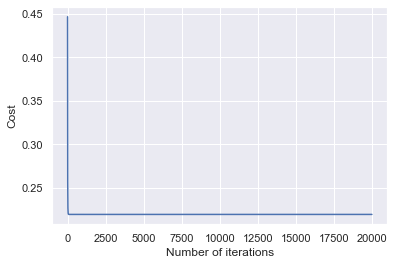

In [35]:
#Model testing for Alpha = 0.1
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.1, 20000);
    return coeffMatrix;

linearModel_te2 = developLinearModel(x1_test,y1_test);

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4957744898558307 

Threshold level 0.001 

Cost Function converges at 82 

Model Cost:  0.2912704375276273 

Model Coefficients: 
[[ 0.          0.49798128  0.39646621  0.08274299 -0.39506821 -0.3831481
   0.00124869 -0.0027087  -0.01340742 -0.01663454 -0.04167878 -0.05741368
  -0.00863371 -0.08716639 -0.01901193]]
alpha: 0.01


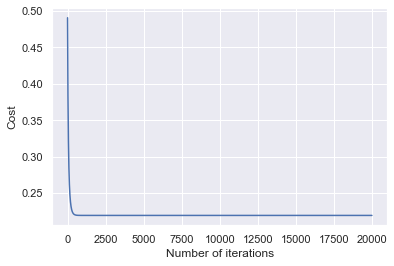

In [36]:
#Model testing for Alpha = 0.01
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.01, 20000);
    return coeffMatrix;

linearModel_te3 = developLinearModel(x1_test,y1_test);

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4957744898558307 

Threshold level 0.001 

Cost Function converges at 90 

Model Cost:  0.3451309138093249 

Model Coefficients: 
[[ 0.          0.49798128  0.39646621  0.08274299 -0.39506821 -0.3831481
   0.00124869 -0.0027087  -0.01340742 -0.01663454 -0.04167878 -0.05741368
  -0.00863371 -0.08716639 -0.01901193]]
alpha: 0.005


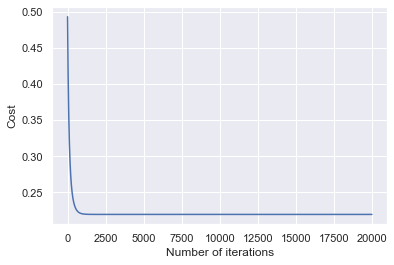

In [38]:
#Model testing for Alpha = 0.005
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.005, 20000);
    return coeffMatrix;

linearModel_te4= developLinearModel(x1_test,y1_test);

In [ ]:
fig , ax = plt.subplots()
ax.plot(finalCost_train,alpha)
ax.set_xlabel('Cost')  
ax.set_ylabel('Alpha')  
ax.set_title('cost vs. Training set Alpha')  

fig , ax = plt.subplots()
ax.plot(finalCost_test,alpha)
ax.set_xlabel('Cost')  
ax.set_ylabel('Alpha')  
ax.set_title('cost vs. Test set Alpha') 

# Linear Regression using In-built Function

In [39]:

from sklearn import datasets, linear_model, metrics 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(x1_train, y1_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [[ 0.00000000e+00  5.02711598e-01  3.96888892e-01  8.74278405e-02
  -3.96128268e-01 -3.80901078e-01  1.01537402e-03 -1.88905513e-04
  -1.02494428e-02 -1.48788919e-02 -4.07202188e-02 -5.92750696e-02
  -7.41692965e-03 -8.35714643e-02 -2.08337214e-02]]


# Linear regression Function for best Alpha value

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 0.001 

Cost Function converges at 0 

Model Cost:  0.4999464549370861 

Model Coefficients: 
[[ 0.          0.39428149  0.30525562  0.0318698  -0.27322182 -0.26272944
  -0.00225323 -0.0074621  -0.00846963  0.06466368  0.03001472 -0.0517453
  -0.00598753 -0.07156813 -0.01828802]]
alpha: 0.0001


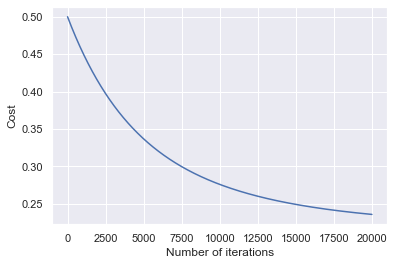

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4957744898558307 

Threshold level 0.001 

Cost Function converges at 0 

Model Cost:  0.49572260826229825 

Model Coefficients: 
[[ 0.          0.38874527  0.3034738   0.02711196 -0.27203048 -0.26345766
  -0.00092157 -0.0098308  -0.01252054  0.06171268  0.02903122 -0.04849389
  -0.0084513  -0.07700348 -0.01579351]]
alpha: 0.0001


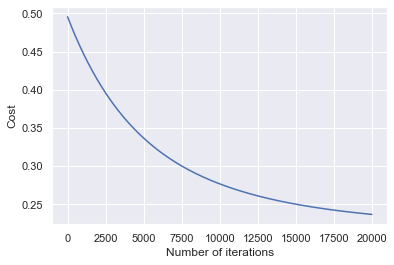

In [41]:
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.0001, 20000);
    return coeffMatrix;

linearModel_trbe = developLinearModel(x1_train,y1_train)
linearModel_tebe = developLinearModel(x1_test,y1_test)

In [42]:
predictedTarget_te1 = predict(x1_test, linearModel_te1);

predictedTarget_te2 = predict(x1_test, linearModel_te2);

predictedTarget_te3 = predict(x1_test, linearModel_te3);

predictedTarget_te4 = predict(x1_test, linearModel_te4);

predictedTarget_tebe = predict(x1_test, linearModel_tebe);

predictedTarget_tr1 = predict(x1_train, linearModel_tr1);
predictedTarget_tr2 = predict(x1_train, linearModel_tr2);
predictedTarget_tr3 = predict(x1_train, linearModel_tr3);

predictedTarget_tr4 = predict(x1_train, linearModel_tr4);
predictedTarget_trbe = predict(x1_train, linearModel_trbe);

In [43]:
modelMSE_te1 = calculateMSE(y1_test, predictedTarget_te1);

modelMSE_te2 = calculateMSE(y1_test, predictedTarget_te2);

modelMSE_te3 = calculateMSE(y1_test, predictedTarget_te3);

modelMSE_te4 = calculateMSE(y1_test, predictedTarget_te4);

modelMSE_tebe = calculateMSE(y1_test, predictedTarget_tebe);

modelMSE_tr1 = calculateMSE(y1_train, predictedTarget_tr1);
modelMSE_tr2 = calculateMSE(y1_train, predictedTarget_tr2);
modelMSE_tr3 = calculateMSE(y1_train, predictedTarget_tr3);
modelMSE_tr4 = calculateMSE(y1_train, predictedTarget_tr4);

modelMSE_trbe = calculateMSE(y1_train, predictedTarget_trbe);

In [44]:
print('Model MSE Train1 for Alpha 0.2:', modelMSE_tr1,'\n');
print('Model MSE Train2 for Alpha 0.1:', modelMSE_tr2,'\n');
print('Model MSE Train3 for Alpha 0.01:', modelMSE_tr3,'\n');
print('Model MSE Train5 for Alpha 0.005:', modelMSE_tr4,'\n');
print('Model MSE Train5 for Alpha 0.0001:', modelMSE_trbe,'\n');

Model MSE Train1 for Alpha 0.2: [0.43715949] 

Model MSE Train2 for Alpha 0.1: [0.43715949] 

Model MSE Train3 for Alpha 0.01: [0.43715949] 

Model MSE Train5 for Alpha 0.005: [0.43715949] 

Model MSE Train5 for Alpha 0.0001: [0.47161706] 



In [45]:
print('Model MSE Test for Alpha 0.2:', modelMSE_te1,'\n');

print('Model MSE Test for Alpha 0.1', modelMSE_te2,'\n');

print('Model MSE Test for Alpha 0.01:', modelMSE_te3,'\n');

print('Model MSE Test for Alpha 0.005:', modelMSE_te4,'\n');

print('Model MSE Test for Alpha 0.0001:', modelMSE_tebe,'\n');

Model MSE Test for Alpha 0.2: [0.43881548] 

Model MSE Test for Alpha 0.1 [0.43881548] 

Model MSE Test for Alpha 0.01: [0.43881548] 

Model MSE Test for Alpha 0.005: [0.43881548] 

Model MSE Test for Alpha 0.0001: [0.47349195] 



In [46]:
modelR2_tr1 = modelRSquared(y1_train, predictedTarget_tr1);
modelR2_tr2 = modelRSquared(y1_train, predictedTarget_tr2);
modelR2_tr3 = modelRSquared(y1_train, predictedTarget_tr3);
modelR2_tr4 = modelRSquared(y1_train, predictedTarget_tr4);

print('Model R-Squared for Training: ','\n', modelR2_tr1,'\n', modelR2_tr2,'\n', 
      modelR2_tr3,'\n',modelR2_tr4, '\n');

modelR2_te1 = modelRSquared(y1_test, predictedTarget_te1);
modelR2_te2 = modelRSquared(y1_test, predictedTarget_te2);
modelR2_te3 = modelRSquared(y1_test, predictedTarget_te3);

print('Model R-Squared for Test: ','\n', modelR2_te1,'\n', 
      modelR2_te2,'\n',modelR2_te3, '\n');


Model R-Squared for Training:  
 0.562840507436361 
 0.562840507436361 
 0.5628405074363609 
 0.5628405074363609 

Model R-Squared for Test:  
 0.5573994371081722 
 0.5573994371081722 
 0.5573994371081721 



# Compute cost with all betas as zeroes

In [59]:
Cost0 = costFunction(X_train,y_train,beta)
print(Cost0)

0.5012799903372215


# Experiment 1 Part B (Logistic Regression)

In [65]:
# Finding the threshold value for doing the classification
gpuread.log_avg_run.describe()


count    241600.000000
mean          4.623068
std           1.128531
min           2.589000
25%           3.705000
50%           4.245000
75%           5.431000
max           8.114000
Name: log_avg_run, dtype: float64

In [66]:
gpuread.log_avg_run.median()

4.245

In [67]:
TF = gpuread.log_avg_run > 4.245
values = TF.value_counts()
print(values)

False    120801
True     120799
Name: log_avg_run, dtype: int64


In [2]:
X_Logistic = gpuread.iloc[:,0:14].values  
X_Logistic.shape()

y_Logistic = gpuread.iloc[:,14:15]
#print(y_Logistic)

NameError: name 'gpuread' is not defined

#  Convert value above 4.24(Median Value) to 1s and below to 0s

In [71]:
gpuread['gpuruntime_class'] = np.where(gpuread['log_avg_run']>=4.24, 1, 0)
gpuread['gpuruntime_class'] = gpuread['gpuruntime_class'].astype('category')

gpuread.head()


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,log_avg_run,gpuruntime_class
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,4.757,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,4.366,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,4.389,1
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,4.462,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,4.776,1


In [ ]:
X = log_train.iloc[:, :14] # X variables from the dataset

x = np.full([169120,1],1) # X(0) variables added for beta(0) variables as 1
X = np.hstack((x,X)) # full set of X variables

Y = log_train["Class"] # Y avriables

B = np.zeros(X.shape[1]) # beta variables

X.shape, Y.shape, B.shape #dimensions for the X, Y, beta vectors

In [53]:
from sklearn.model_selection import train_test_split
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_Logistic, gpuread['gpuruntime_class'], test_size = 0.3, random_state = 0)

# Feature Scaling

sc_Logistic = StandardScaler()
X_train_l = sc_Logistic.fit_transform(X_train_l)
X_test_l = sc_Logistic.transform(X_test_l)


NameError: name 'X_Logistic' is not defined

# Logistic Regression

Initial cost is 0.693147 when all betas are 0


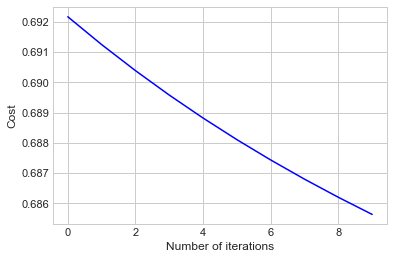

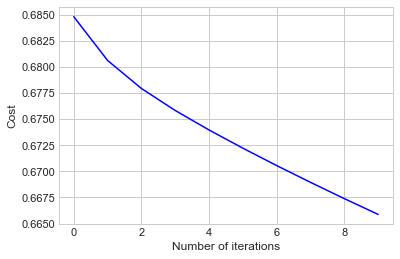

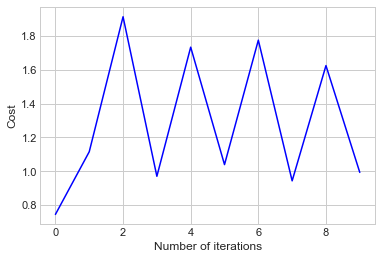

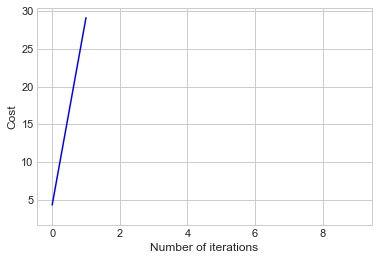

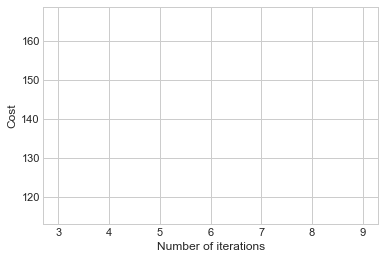

For 10 iterations, Minimum cost for training set is 0.665871 at alpha = 0.000100.
Minimum cost for test set is 0.665318 obtained at same set of beta values.


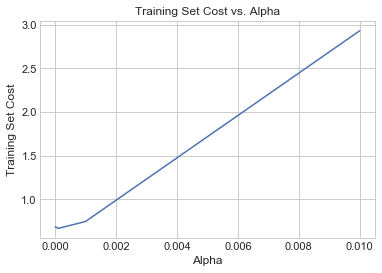

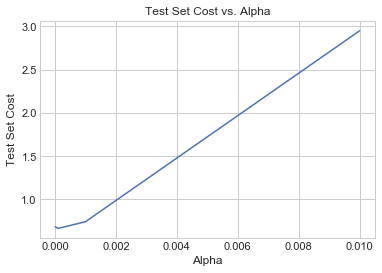

In [49]:

# Defining cost function
def cost_function(X, Y, B):
    xB = np.dot(X, B)
    yhat = 1 / (1 + np.exp(-xB))
    identity = np.ones(len(yhat))
    sum1 = (np.multiply(Y, np.log(yhat)) + np.multiply((identity - Y), np.log((identity - yhat))))
    return np.sum(sum1) / (-len(X))

# Defining batch gradient function
def gradient_descent(x, y, beta, alpha, iterations):
    cost_final = []
    beta_list = []
    # B = beta
    m = len(y)
    temp_B = beta.copy()
    for i in range(iterations):
        xB = np.dot(x, beta)
        z = 1 / (1 + np.exp(-xB))
        for j in range(x.shape[1]):
            temp_B[j] = beta[j] - (alpha/m) * sum((z - y) * x[:,j])
        beta = temp_B.copy()
        cost = cost_function(x, y, beta)
        beta_list.append(beta)
        cost_final.append(cost)
    min_cost = min(cost_final)
    min_index = cost_final.index(min_cost)
    b = beta_list[min_index]
    # return b, min_cost
    min_cost = min(cost_final)
    min_index = cost_final.index(min_cost)
    b = beta_list[min_index]
    itera = np.arange(iterations)
    plt.style.use('seaborn-whitegrid')
    plt.plot(itera, cost_final, color='blue')
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")
    plt.show()
    return b, min_cost


def experiment1(x_train, x_test, y_train, y_test, B):
    maxiter = 10
    alpha_list = [0.00001, 0.0001, 0.001, 0.01, 0.1]
    beta_list = []
    cost_train = []
    cost_test = []
    for item in alpha_list:
        beta, cost = gradient_descent(x_train, y_train, B, item, maxiter)
        beta_list.append(beta)
        cost_train.append(cost)
        cost_temp = cost_function(x_test, y_test, beta)
        cost_test.append(cost_temp)

    # plot for training set
    fig, ax = plt.subplots()
    ax.plot(alpha_list, cost_train)
    ax.set_ylabel('Training Set Cost')
    ax.set_xlabel('Alpha')
    ax.set_title('Training Set Cost vs. Alpha')
    # plot for testing set
    fig, ax = plt.subplots()
    ax.plot(alpha_list, cost_test)
    ax.set_ylabel('Test Set Cost')
    ax.set_xlabel('Alpha')
    ax.set_title('Test Set Cost vs. Alpha')
    # calculating best parameters for training set
    min_cost_train = min(cost_train)
    min_index_train = cost_train.index(min_cost_train)
    b = beta_list[min_index_train]
    print('For %d iterations, Minimum cost for training set is %f at alpha = %f.' % (
        maxiter, min_cost_train, alpha_list[min_index_train]))
    min_cost_test = min(cost_test)
    min_index_test = cost_test.index(min_cost_test)
    if min_index_test == min_index_train:
        print('Minimum cost for test set is %f obtained at same set of beta values.' % (min_cost_test))
    else:
        print('Minimum cost for test set is %f obtained at different set of betas at alpha = %f.' %
              (min_cost_test, alpha_list[min_index_test]))


def logisticRegression():
    # loading dataset
    df = pd.read_csv(
        r"C:\Users\14696\Desktop\Spring 2020\BUAN 6341.004 - Applied Machine Learning\Assignments\sgemm_product_dataset\sgemm_product.csv")
    # creating new column of average run time
    df['AvgRun'] = round((df['Run1 (ms)'] + df['Run2 (ms)'] + df['Run3 (ms)'] + df['Run4 (ms)']) / 4, 2)
    df.drop(['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)'], inplace=True, axis=1)
    X = df.iloc[:, :14]  # X variables from dataset
    x = np.full([X.shape[0], 1], 1)  # X(0) variables added for beta(0) variables as 1
    X = np.hstack((x, X))  # full set of X variables
    Y = df["AvgRun"].values  # Y variable
    y_median = np.median(Y)
    Y = np.where(Y < y_median, 0, 1)
    B = np.zeros(X.shape[1])  # beta variables
    # splitting data into 70-30 ratio
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    # initial cost calculation
    initial_cost = cost_function(x_train, y_train, B)
    print("Initial cost is %f when all betas are 0" % initial_cost)
    experiment1(x_train, x_test, y_train, y_test, B)


logisticRegression()


def linear_prebuilt(x, y):
    from sklearn import datasets, linear_model, metrics
    reg = linear_model.LinearRegression()
    # train the model using the training sets
    reg.fit(x, y)
    # regression coefficients
    print('Coefficients: \n', reg.coef_)


# Logistic Regression using in-built Function 

# Gradient Boosting Classifier

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
lr_list = [0.05, 0.075, 0.1,0.01, 0.001,0.0001,0.25, 0.5, 0.75, 1,1.25]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=14, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train_l, y_train_l)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_l, y_train_l)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test_l, y_test_l)))

NameError: name 'X_train_l' is not defined

In [78]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1,1.25]

for learning_rate in lr_list:
    gb_clf2 = GradientBoostingClassifier(n_estimators=14, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf2.fit(X_train_l, y_train_l)
    predictions = gb_clf2.predict(X_test_l)
    print("Learning rate: ", learning_rate)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_l, predictions))
    print("Classification Report")
    print(classification_report(y_test_l, predictions))

Learning rate:  0.05
Confusion Matrix:
[[27754  8492]
 [ 9148 27086]]
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     36246
           1       0.76      0.75      0.75     36234

    accuracy                           0.76     72480
   macro avg       0.76      0.76      0.76     72480
weighted avg       0.76      0.76      0.76     72480

Learning rate:  0.075
Confusion Matrix:
[[28573  7673]
 [ 9659 26575]]
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.79      0.77     36246
           1       0.78      0.73      0.75     36234

    accuracy                           0.76     72480
   macro avg       0.76      0.76      0.76     72480
weighted avg       0.76      0.76      0.76     72480

Learning rate:  0.1
Confusion Matrix:
[[28699  7547]
 [ 9796 26438]]
Classification Report
              precision    recall  f1-score   support

           0   

# Experiment 2

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 0.001 

Cost Function converges at 0 

Model Cost:  0.4999464549370861 

Model Coefficients: 
[[ 0.          0.48291914  0.37977682  0.07449038 -0.37192771 -0.35756293
   0.00155491 -0.00113165 -0.01008376  0.0052185  -0.02333144 -0.05902969
  -0.00723647 -0.08282397 -0.02073982]]
alpha: 0.0001


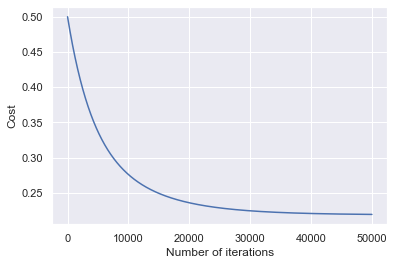

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4957744898558307 

Threshold level 0.001 

Cost Function converges at 0 

Model Cost:  0.49572260826229825 

Model Coefficients: 
[[ 0.          0.47789781  0.37894007  0.06940688 -0.37076165 -0.35941417
   0.00212537 -0.00376413 -0.01355095  0.00330561 -0.02435142 -0.05666287
  -0.00887597 -0.08701942 -0.01877061]]
alpha: 0.0001


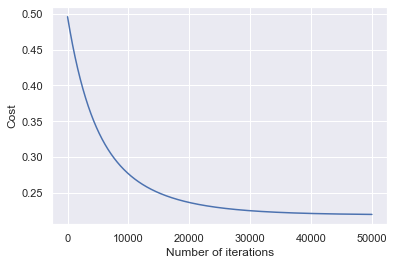

In [79]:
#different Threshold levels:
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.001];   # Threshold value
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLinearModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.0001,50000);
    return coeffMatrix;
linearModel_tr11 = developLinearModel_1(x1_train,y1_train)
linearModel_te11 = developLinearModel_1(x1_test,y1_test)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 0.0001 

Cost Function converges at 0 

Model Cost:  0.4999464549370861 

Model Coefficients: 
[[ 0.          0.48291914  0.37977682  0.07449038 -0.37192771 -0.35756293
   0.00155491 -0.00113165 -0.01008376  0.0052185  -0.02333144 -0.05902969
  -0.00723647 -0.08282397 -0.02073982]]
alpha: 0.0001


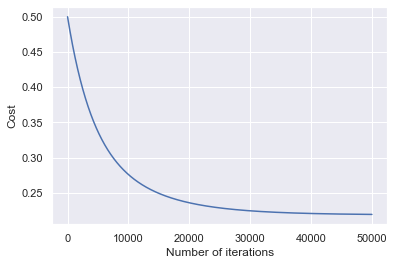

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4957744898558307 

Threshold level 0.0001 

Cost Function converges at 0 

Model Cost:  0.49572260826229825 

Model Coefficients: 
[[ 0.          0.47789781  0.37894007  0.06940688 -0.37076165 -0.35941417
   0.00212537 -0.00376413 -0.01355095  0.00330561 -0.02435142 -0.05666287
  -0.00887597 -0.08701942 -0.01877061]]
alpha: 0.0001


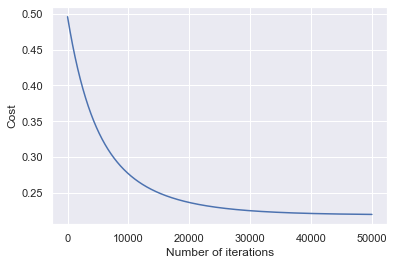

In [80]:
#different Threshold levels:
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.0001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLinearModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.0001,50000);
    return coeffMatrix;
linearModel_tr21 = developLinearModel_1(x1_train,y1_train)
linearModel_te21 = developLinearModel_1(x1_test,y1_test)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 1e-05 

Cost Function converges at 8392 

Model Cost:  0.2900026625795093 

Model Coefficients: 
[[ 0.          0.48291914  0.37977682  0.07449038 -0.37192771 -0.35756293
   0.00155491 -0.00113165 -0.01008376  0.0052185  -0.02333144 -0.05902969
  -0.00723647 -0.08282397 -0.02073982]]
alpha: 0.0001


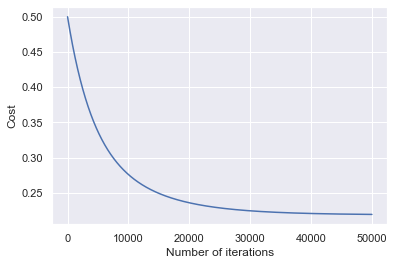

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4957744898558307 

Threshold level 1e-05 

Cost Function converges at 8328 

Model Cost:  0.2913323714487293 

Model Coefficients: 
[[ 0.          0.47789781  0.37894007  0.06940688 -0.37076165 -0.35941417
   0.00212537 -0.00376413 -0.01355095  0.00330561 -0.02435142 -0.05666287
  -0.00887597 -0.08701942 -0.01877061]]
alpha: 0.0001


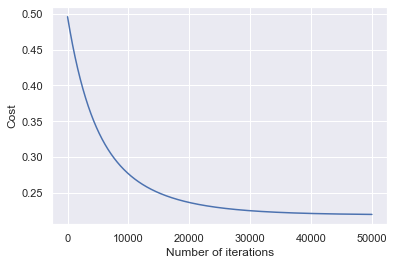

In [83]:
#different Threshold levels:
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.00001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLinearModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.0001,50000);
    return coeffMatrix;
linearModel_tr31 = developLinearModel_1(x1_train,y1_train)
linearModel_te31 = developLinearModel_1(x1_test,y1_test)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 1e-06 

Cost Function converges at 25659 

Model Cost:  0.22784671275753865 

Model Coefficients: 
[[ 0.          0.48291914  0.37977682  0.07449038 -0.37192771 -0.35756293
   0.00155491 -0.00113165 -0.01008376  0.0052185  -0.02333144 -0.05902969
  -0.00723647 -0.08282397 -0.02073982]]
alpha: 0.0001


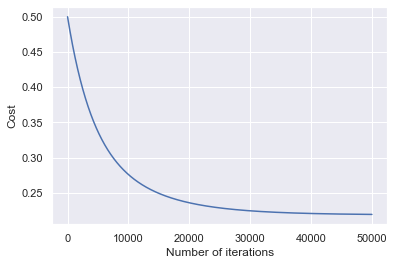

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4957744898558307 

Threshold level 1e-06 

Cost Function converges at 25707 

Model Cost:  0.22870384534324775 

Model Coefficients: 
[[ 0.          0.47789781  0.37894007  0.06940688 -0.37076165 -0.35941417
   0.00212537 -0.00376413 -0.01355095  0.00330561 -0.02435142 -0.05666287
  -0.00887597 -0.08701942 -0.01877061]]
alpha: 0.0001


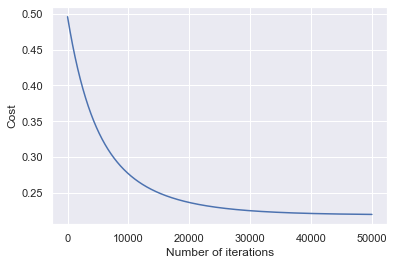

In [84]:
#different Threshold levels:
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.000001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLinearModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.0001,50000);
    return coeffMatrix;
linearModel_tr41 = developLinearModel_1(x1_train,y1_train)
linearModel_te41 = developLinearModel_1(x1_test,y1_test)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 1e-07 

Cost Function converges at 47157 

Model Cost:  0.21953119110213745 

Model Coefficients: 
[[ 0.          0.48291914  0.37977682  0.07449038 -0.37192771 -0.35756293
   0.00155491 -0.00113165 -0.01008376  0.0052185  -0.02333144 -0.05902969
  -0.00723647 -0.08282397 -0.02073982]]
alpha: 0.0001


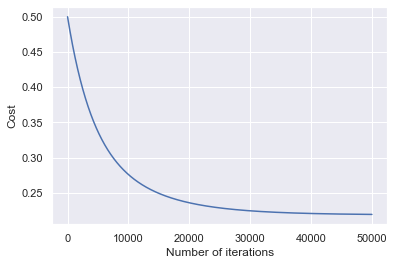

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4957744898558307 

Threshold level 1e-07 

Cost Function converges at 47271 

Model Cost:  0.22036230253509162 

Model Coefficients: 
[[ 0.          0.47789781  0.37894007  0.06940688 -0.37076165 -0.35941417
   0.00212537 -0.00376413 -0.01355095  0.00330561 -0.02435142 -0.05666287
  -0.00887597 -0.08701942 -0.01877061]]
alpha: 0.0001


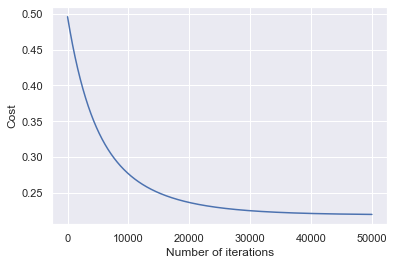

In [85]:
#different Threshold levels:
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.0000001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLinearModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.0001,50000);
    return coeffMatrix;
linearModel_tr51 = developLinearModel_1(x1_train,y1_train)
linearModel_te51 = developLinearModel_1(x1_test,y1_test)

In [86]:
predictedTarget_te11 = predict(x1_test, linearModel_te11);
predictedTarget_te21 = predict(x1_test, linearModel_te21);
predictedTarget_te31 = predict(x1_test, linearModel_te31);
predictedTarget_te41 = predict(x1_test, linearModel_te41);
predictedTarget_te51 = predict(x1_test, linearModel_te51);

predictedTarget_tr11 = predict(x1_train, linearModel_tr11);
predictedTarget_tr21 = predict(x1_train, linearModel_tr21);
predictedTarget_tr31 = predict(x1_train, linearModel_tr31);
predictedTarget_tr41 = predict(x1_train, linearModel_tr41);
predictedTarget_tr51 = predict(x1_train, linearModel_tr51);

In [87]:
modelMSE_te11 = calculateMSE(y1_test, predictedTarget_te11);
modelMSE_te21 = calculateMSE(y1_test, predictedTarget_te21);
modelMSE_te31 = calculateMSE(y1_test, predictedTarget_te31);
modelMSE_te41= calculateMSE(y1_test, predictedTarget_te41);
modelMSE_te51 = calculateMSE(y1_test, predictedTarget_te51);

modelMSE_tr11 = calculateMSE(y1_train, predictedTarget_tr11);
modelMSE_tr21 = calculateMSE(y1_train, predictedTarget_tr21);
modelMSE_tr31 = calculateMSE(y1_train, predictedTarget_tr31);
modelMSE_tr41 = calculateMSE(y1_train, predictedTarget_tr41);
modelMSE_tr51 = calculateMSE(y1_train, predictedTarget_tr51);

In [88]:
print('Model MSE Train1 for Threshold 0.001:', modelMSE_tr11,'\n');
print('Model MSE Train2 for Threshold 0.0001:', modelMSE_tr21,'\n');
print('Model MSE Train3 for Threshold 0.00001:', modelMSE_tr31,'\n');
print('Model MSE Train4 for Threshold 0.000001:', modelMSE_tr41,'\n');
print('Model MSE Train5 for Threshold 0.0000001:', modelMSE_tr51,'\n');

Model MSE Train1 for Threshold 0.001: [0.43857115] 

Model MSE Train2 for Threshold 0.0001: [0.43857115] 

Model MSE Train3 for Threshold 0.00001: [0.43857115] 

Model MSE Train4 for Threshold 0.000001: [0.43857115] 

Model MSE Train5 for Threshold 0.0000001: [0.43857115] 



In [89]:

print('Model MSE Test for Threshold 0.001:', modelMSE_te11,'\n');
print('Model MSE Test for Threshold 0.0001:', modelMSE_te21,'\n');
print('Model MSE Test for Threshold 0.00001:', modelMSE_te31,'\n');
print('Model MSE Test for Threshold 0.000001:', modelMSE_te41,'\n');
print('Model MSE Test for Threshold 0.0000001:', modelMSE_te51,'\n');

Model MSE Test for Threshold 0.001: [0.44025014] 

Model MSE Test for Threshold 0.0001: [0.44025014] 

Model MSE Test for Threshold 0.00001: [0.44025014] 

Model MSE Test for Threshold 0.000001: [0.44025014] 

Model MSE Test for Threshold 0.0000001: [0.44025014] 



In [91]:

modelR2_tr11 = modelRSquared(y1_train, predictedTarget_tr11);
modelR2_tr21 = modelRSquared(y1_train, predictedTarget_tr21);
modelR2_tr31 = modelRSquared(y1_train, predictedTarget_tr31);
modelR2_tr41 = modelRSquared(y1_train, predictedTarget_tr41);
modelR2_tr51 = modelRSquared(y1_train, predictedTarget_tr51);

modelR2_te11 = modelRSquared(y1_test, predictedTarget_te11);
modelR2_te21 = modelRSquared(y1_test, predictedTarget_te21);
modelR2_te31 = modelRSquared(y1_test, predictedTarget_te31);
modelR2_te41 = modelRSquared(y1_test, predictedTarget_te41);
modelR2_te51 = modelRSquared(y1_test, predictedTarget_te51);

In [92]:
print('Model R-Squared for Training: ','\n', modelR2_tr11,'\n', modelR2_tr21,'\n', 
      modelR2_tr31,'\n', modelR2_tr41,'\n',modelR2_tr51, '\n');

Model R-Squared for Training:  
 0.561428847872997 
 0.561428847872997 
 0.561428847872997 
 0.561428847872997 
 0.561428847872997 



In [93]:
print('Model R-Squared for Test: ','\n', modelR2_te11,'\n', modelR2_te21,'\n', 
      modelR2_te31,'\n', modelR2_te41,'\n',modelR2_te51, '\n');

Model R-Squared for Test:  
 0.5559524061243888 
 0.5559524061243888 
 0.5559524061243888 
 0.5559524061243888 
 0.5559524061243888 



# Experiment 3 Random Features

In [94]:
feature_d=["MWG","KWG","MDIMC","MDIMA","KWI","VWN","STRN","SB"]
X=gpuread[feature_d]

X.head()

ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
print(X)

y = df.iloc[:,14:15].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray



x3_train, x3_test, y3_train, y3_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

x3_train=scaler.fit_transform(x3_train)
x3_test=scaler.transform(x3_test)
y3_train = scaler.fit_transform(y3_train)
y3_test=scaler.transform(y3_test)

[[  1.  16.  16. ...   1.   0.   0.]
 [  1.  16.  16. ...   1.   0.   1.]
 [  1.  16.  16. ...   1.   0.   0.]
 ...
 [  1. 128.  32. ...   4.   1.   1.]
 [  1. 128.  32. ...   4.   1.   0.]
 [  1. 128.  32. ...   4.   1.   1.]]


[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 1e-07 

Cost Function converges at 31758 

Model Cost:  0.3360074765744598 

Model Coefficients: 
[[ 0.          0.49386962  0.0198667  -0.29671371 -0.03907304 -0.01005116
   0.14652606 -0.0070533  -0.02031578]]
alpha: 0.0001


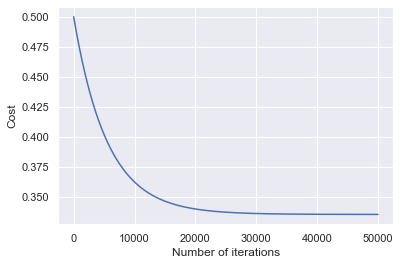

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4957744898558307 

Threshold level 1e-07 

Cost Function converges at 31712 

Model Cost:  0.3371047057414586 

Model Coefficients: 
[[ 0.          0.48493871  0.01322636 -0.29545361 -0.03797663 -0.01358786
   0.14644014 -0.00933275 -0.01975174]]
alpha: 0.0001


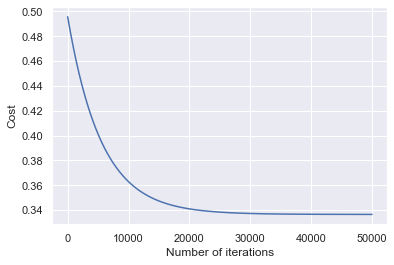

In [96]:
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.0001, 50000);
    return coeffMatrix;
linearModel_31 = developLinearModel(x3_train,y3_train)
linearModel_32 = developLinearModel(x3_test,y3_test)

# Evaluation Metrics

In [98]:
predictedTarget_31 = predict(x3_train, linearModel_31);

modelMSE_31 = calculateMSE(y3_train, predictedTarget_31);

print('Model MSE Train:', modelMSE_31,'\n');

modelR2_31 = modelRSquared(y3_train, predictedTarget_31);
print('Model R-Squared for Test: ', modelR2_31);

Model MSE Train: [0.67092076] 

Model R-Squared for Test:  0.329079236508661


In [102]:
predictedTarget_32 = predict(x3_test, linearModel_32);

modelMSE_32 = calculateMSE(y3_test, predictedTarget_32);

print('Model MSE:', modelMSE_32,'\n');

modelR2_32 = modelRSquared(y3_test, predictedTarget_32);
print('Model R-Squared for Test: ', modelR2_32);


Model MSE: [0.67311134] 

Model R-Squared for Test:  0.3210826187907746


In [104]:
from sklearn.model_selection import train_test_split
X_train_l3, X_test_l3, y_train_l3, y_test_l3 = train_test_split(X, gpuread["gpuruntime_class"], test_size = 0.3, random_state = 0)
gb_clf = GradientBoostingClassifier( learning_rate=1.25, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train_l3, y_train_l3)

print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_l3, y_train_l3)))
print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test_l3, y_test_l3)))
predictions = gb_clf.predict(X_test_l3)
print("Confusion Matrix:")
print(confusion_matrix(y_test_l3, predictions))
print("Classification Report")
print(classification_report(y_test_l3, predictions))

Learning rate:  1.25
Accuracy score (training): 0.743
Accuracy score (test): 0.739
Confusion Matrix:
[[26906  9340]
 [ 9602 26632]]
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     36246
           1       0.74      0.74      0.74     36234

    accuracy                           0.74     72480
   macro avg       0.74      0.74      0.74     72480
weighted avg       0.74      0.74      0.74     72480



# Experiment_4 Best Selection Features

In [106]:
feature_c=["MWG","NWG","KWG","MDIMC","NDIMC","MDIMA","NDIMB","KWI"]
feature_4=gpuread[feature_c]
target_4=gpuread["log_avg_run"]

X = df.iloc[:,0:8]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
#print(X)

y = df.iloc[:,14:15].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray


x4_train, x4_test, y4_train, y4_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
y4_train.reshape(-1,1)

x4_train=scaler.fit_transform(x4_train)
x4_test=scaler.transform(x4_test)
y4_train = scaler.fit_transform(y4_train)
y4_test=scaler.transform(y4_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 1e-07 

Cost Function converges at 41246 

Model Cost:  0.2256736675396845 

Model Coefficients: 
[[ 0.          0.49169847  0.37650871  0.07440178 -0.37414518 -0.35584188
  -0.00346447  0.00087359 -0.01017013]]
alpha: 0.0001


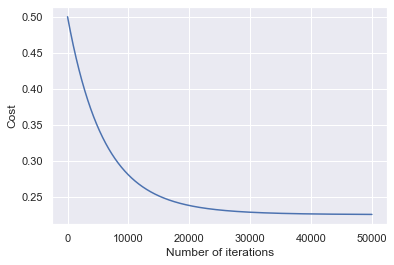

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4957744898558307 

Threshold level 1e-07 

Cost Function converges at 41515 

Model Cost:  0.2267311051098519 

Model Coefficients: 
[[ 0.          0.48572268  0.37495811  0.06987556 -0.37374701 -0.35830505
  -0.00278337 -0.00069514 -0.01332146]]
alpha: 0.0001


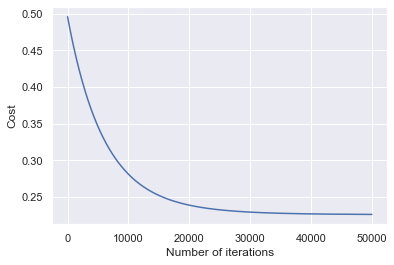

In [107]:
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.0001, 50000);
    return coeffMatrix;
linearModel_41 = developLinearModel(x4_train,y4_train)
linearModel_42 = developLinearModel(x4_test,y4_test)


In [108]:
predictedTarget_41 = predict(x4_test, linearModel_41);

modelMSE_41 = calculateMSE(y4_test, predictedTarget_41);

print('Model MSE Train:', modelMSE_41,'\n');

modelR2_41 = modelRSquared(y4_test, predictedTarget_41);
print('Model R-Squared for Train: ', modelR2_41,);

Model MSE Train: [0.45238357] 

Model R-Squared for Train:  0.5437143114204992


In [109]:
predictedTarget_42 = predict(x4_test, linearModel_42);

modelMSE_42 = calculateMSE(y4_test, predictedTarget_42);

print('Model MSE Text:', modelMSE_42,'\n');

modelR2_42 = modelRSquared(y4_test, predictedTarget_41);
print('Model R-Squared for Test: ', modelR2_42,);

Model MSE Text: [0.45239629] 

Model R-Squared for Test:  0.5437143114204992


In [110]:
from sklearn.model_selection import train_test_split
X_train_l4, X_test_l4, y_train_l4, y_test_l4 = train_test_split(X, gpuread['gpuruntime_class'], test_size = 0.4, random_state = 0)
gb_clf = GradientBoostingClassifier( learning_rate=1.25, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train_l4, y_train_l4)

print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.4f}".format(gb_clf.score(X_train_l4, y_train_l4)))
print("Accuracy score (test): {0:.4f}".format(gb_clf.score(X_test_l4, y_test_l4)))
predictions = gb_clf.predict(X_test_l4)
print("Confusion Matrix:")
print(confusion_matrix(y_test_l4, predictions))
print("Classification Report")
print(classification_report(y_test_l4, predictions))

Learning rate:  1.25
Accuracy score (training): 0.8783
Accuracy score (test): 0.8789
Confusion Matrix:
[[44449  3778]
 [ 7921 40492]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     48227
           1       0.91      0.84      0.87     48413

    accuracy                           0.88     96640
   macro avg       0.88      0.88      0.88     96640
weighted avg       0.88      0.88      0.88     96640

